In [ ]:
import pandas as pd

In [ ]:
sales_data = pd.read_csv('/Users/guybasson/Desktop/sdatta-nlp/palmers_fashion/f_sales_v_fashion_with_price.csv')
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['item'] = sales_data['sku'].astype(str)
sales_data['store'] = sales_data['store'].astype(str)
sales_data = sales_data.rename(columns={'total_sales':'sales'})
sales_data

In [ ]:
mbew_fashion = pd.read_csv('mbew_fashion.csv')
mbew_fashion['valid_to_date'] = mbew_fashion['valid_to_date'].replace('9999-12-31', sales_data['date'].max())
mbew_fashion['valid_to_date'] = pd.to_datetime(mbew_fashion['valid_to_date'])
mbew_fashion['valid_from_date'] = pd.to_datetime(mbew_fashion['valid_from_date'])
mbew_fashion['item'] = mbew_fashion['sku'].astype(str).str[:12]
mbew_fashion

In [ ]:
sales_data.columns

In [ ]:
relevant_stores_list = ['100', '117', '119', '123', '130', '133', '135', '136', '141', '143', '144', '149', '150', '152', '162', '164', '166', '167', '168', '171', '172', '175', '179', '18', '181', '184', '185', '186', '188', '189', '202', '214', '216', '217', '22', '226', '28', '29', '3', '3005', '3202', '3205', '3208', '4104', '4123', '4129', '4134', '44', '4803', '4805', '4904', '4906', '51', '57', '63', '73', '74', '76', '79', '88', '89', '91', '96']

In [ ]:
sales_data = sales_data[sales_data['fashiongrade'] == 'M']
sales_data = sales_data[sales_data['store'].astype(str).isin(relevant_stores_list)]

In [ ]:
sales_data['item'] = sales_data['sku'].astype(str).str[:12]

In [ ]:
sales_data_g_item = sales_data.groupby(['date','item'])['sales'].sum().reset_index()

In [ ]:
sales_data_g_item['date'] = pd.to_datetime(sales_data_g_item['date'])

In [ ]:
# sales of sum for each item in 2023 that are large then 0 and fashiongrade is 'M'
items_sales_in_2023 = sales_data_g_item[sales_data_g_item['date'].dt.year == 2023].groupby('item')['sales'].sum().sort_values(ascending=False)[sales_data_g_item[sales_data_g_item['date'].dt.year == 2023].groupby('item')['sales'].sum().sort_values(ascending=False) > 100].index


In [ ]:
import matplotlib.pyplot as plt
for item in items_sales_in_2023[:1]:
    item_data = sales_data_g_item[sales_data_g_item['item'] == item].groupby('date')['sales'].sum()
    fashiongrade = sales_data[sales_data['item'] == item]['fashiongrade'].unique()[0]
    # reindex to fill in missing dates
    item_data = item_data.reindex(pd.date_range(start=sales_data_g_item['date'].min(),
                                                # today
                                                end=sales_data_g_item['date'].max(),

                                                freq='D')).fillna(0)
    item_data_w = item_data.resample('W').sum()
    # fig size
    plt.figure(figsize=(20,4))
    plt.title('item: ' + item + ' fashiongrade: ' + str(fashiongrade))
    item_data_w.plot()
    plt.show()

In [ ]:
for store in relevant_stores_list[:1]:
    store_data = sales_data[sales_data['store'] == store]
    for item in store_data['item'].unique()[:20]:
        item_data = store_data[store_data['item'] == item].groupby('date').agg({'average_price':'mean',
                                                                                'average_dicounted_price':'mean',
                                                                                'sales':'sum'})
        item_store_stock = mbew_fashion[(mbew_fashion['store'] == store) & (mbew_fashion['item'] == item)]
        item_data = item_data.reindex(pd.date_range(start=item_data.index.min(),
                                                    end=item_data.index.max(),
                                                    freq='D'))
        item_data['average_price'] = item_data['average_price'].fillna(method='ffill')
        item_data['average_dicounted_price'] = item_data['average_dicounted_price'].fillna(method='ffill')
        item_data['sales'] = item_data['sales'].fillna(0)

        item_data.plot(figsize=(20,4))
        plt.title('item: ' + item + ' store: ' + str(store))
        plt.show()

/Users/guybasson/Desktop/Palmers/palmers/venv/local_oran/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Users/guybasson/Desktop/Palmers/palmers/venv/local_oran/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/Users/guybasson/Desktop/Palmers/palmers/venv/local_oran/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


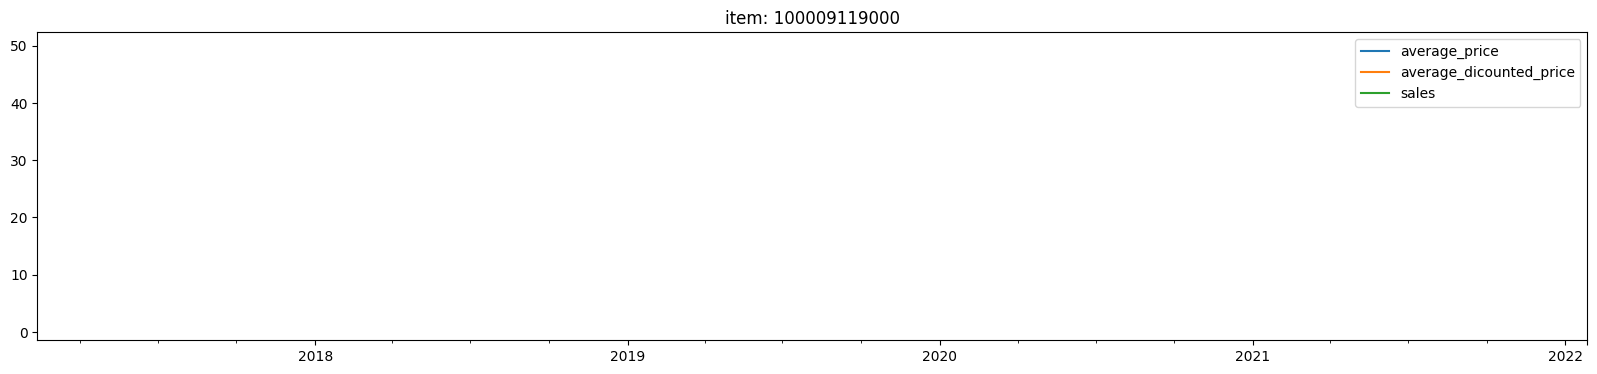

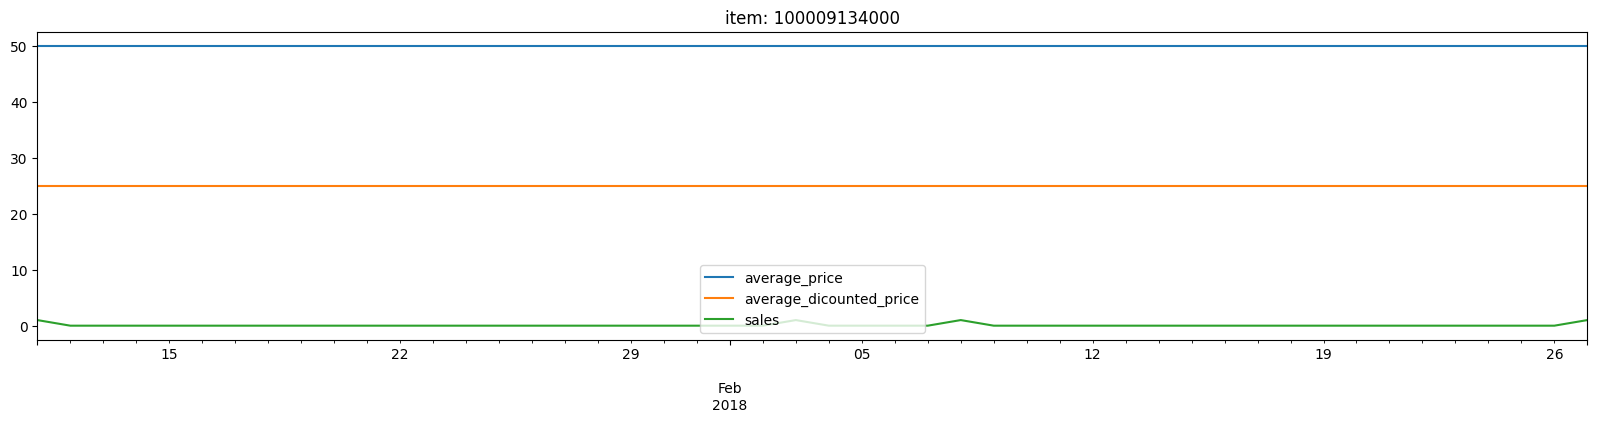

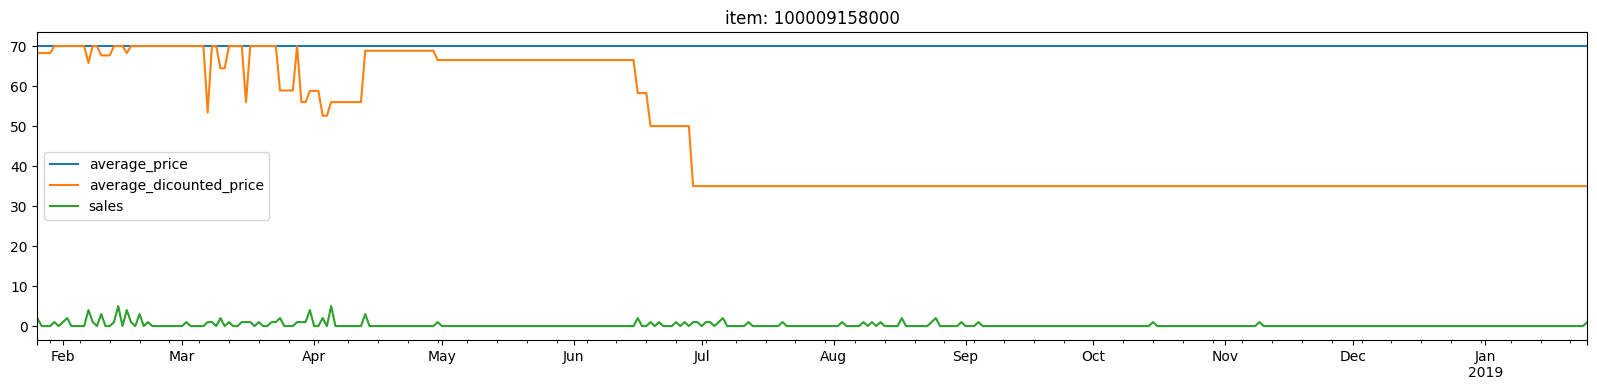

In [ ]:
for item in sales_data['item'].unique()[:10]:
    item_data = sales_data[sales_data['item'] == item].groupby('date').agg({'average_price':'mean',
                                                                            'average_dicounted_price':'mean',
                                                                            'sales':'sum'})
    item_data = item_data.reindex(pd.date_range(start=item_data.index.min(),
                                                end=item_data.index.max(),
                                                freq='D'))
    item_data['average_price'] = item_data['average_price'].fillna(method='ffill')
    item_data['average_dicounted_price'] = item_data['average_dicounted_price'].fillna(method='ffill')
    item_data['sales'] = item_data['sales'].fillna(0)
    item_data.plot(figsize=(20,4))
    plt.title('item: ' + item)
    plt.show()


In [ ]:
item_data